## **Northeastern SMILE Lab - Recognizing Faces in the Wild**

## Background

The SMILE Lab at Northeastern focuses on the frontier research of applied machine learning, social media analytics, human-computer interaction, and high-level image and video understanding. Their research is driven by the explosion of diverse multimedia from the Internet, including both personal and publicly available photos and videos. They start by treating fundamental theory from learning algorithms as the soul of machine intelligence and arm it with visual perception.

Northeastern University has been developing an automatic kinship classifier since 2010. However, the widespread adoption of this technology has been hindered by two primary factors:

- Data Limitations: Existing image databases for kinship recognition are insufficient in size and diversity to accurately represent global familial relationships.

- Model Complexity: The complex interplay of genetic and environmental factors influencing facial features necessitates a more advanced model than traditional computer vision algorithms, which are typically designed for higher-level tasks like facial recognition or object classification.

## Objective

Using the provided competition data, the following model predicts the probability of two individuals being related (1) based solely on a pair of facial images. 

## **Preliminaries**: Install the following Python modules.

In [15]:
# If they are not already installed, this cell installs the modules used in this solution.
%pip install collections
%pip install glob
%pip install kaggle
%pip install os
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install zipfile

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


## **Step 1**: Download the official Kaggle competition data (a.k.a. FIW data).

***Before executing the following cell***, please review section 7 of the rules: https://www.kaggle.com/competitions/recognizing-faces-in-the-wild/rules#7-competition-data. 

All usages of FIW data should cite the following papers:

*Joseph P Robinson, Ming Shao, Hongfu Liu, Yue Wu, Timothy Gillis, and Yun Fu. "Visual Kinship Recognition of Families In the Wild" IEEE TPAMI Special Edition: Computational Face (2018).
Joseph P Robinson, Ming Shao, Handong Zhao, Yue Wu, Timothy Gillis, Yun Fu. "Recognizing Families In the Wild (RFIW): Data Challenge Workshop in conjunction with ACM MM 2017," ACM Multimedia Conference: Workshop on RFIW (2017).
Shuyang Wang, Joseph P Robinson, and Yun Fu. “Kinship Verification on Families in the Wild with Marginalized Denoising Metric Learning,” in IEEE Automatic Face and Gesture Recognition (2017).
Joseph P Robinson, Ming Shao, Yue Wu, and Yun Fu. “Families In the Wild (FIW): large-scale kinship image database and benchmarks." in ACM on Multimedia Conference (2016).*

In [4]:
download_path = '_provided-data' # Exclude this and similar directories recursivly via. .gitignore '_*/' clause
competition = 'recognizing-faces-in-the-wild' # https://www.kaggle.com/c/recognizing-faces-in-the-wild


In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

os.makedirs(download_path, exist_ok=True)
print('Downloading ' + competition + ' provided data into ' + download_path)
api = KaggleApi()
api.authenticate()
api.competition_download_files(competition, path = download_path)

2024-10-28 18:12:49,028 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000026481AA9C40>, 'Connection to www.kaggle.com timed out. (connect timeout=None)')': /api/v1/competitions/data/download-all/recognizing-faces-in-the-wild
2024-10-28 18:12:56,978 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000026481A61280>: Failed to establish a new connection: [WinError 10053] An established connection was aborted by the software in your host machine')': /api/v1/competitions/data/download-all/recognizing-faces-in-the-wild


In [6]:
import os
import zipfile

def unzip(zip_path):
    dest_dir = '_' + os.path.basename(zip_path)[:-4]
    if (not os.path.exists(dest_dir)):
        os.makedirs(dest_dir, exist_ok=True)
        print('Decompressing ' + zip_path + ' into ' + dest_dir)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(dest_dir)
    print('Top level of ' + dest_dir + ':')
    print(os.listdir(dest_dir))
    return dest_dir

dataset_path = unzip(download_path + '/' + competition + '.zip')
families = os.listdir(dataset_path)

Top level of _recognizing-faces-in-the-wild:
['README.md', 'sample_submission.csv', 'test-faces.zip', 'test-private-faces.zip', 'test-private-labels.zip', 'test-private-lists.zip', 'test-public-faces.zip', 'test-public-lists.zip', 'test.zip', 'train-faces.zip', 'train.zip', 'train_relationships.csv']


## **Step 2**: Extract the image portion of the provided dataset.

In [7]:
training_image_path = unzip(dataset_path + '/train-faces.zip')


Top level of _train-faces:
['F0001', 'F0002', 'F0003', 'F0004', 'F0005', 'F0006', 'F0007', 'F0008', 'F0011', 'F0012', 'F0015', 'F0016', 'F0017', 'F0018', 'F0020', 'F0021', 'F0022', 'F0023', 'F0024', 'F0026', 'F0027', 'F0028', 'F0029', 'F0030', 'F0031', 'F0032', 'F0033', 'F0034', 'F0035', 'F0036', 'F0038', 'F0039', 'F0040', 'F0041', 'F0042', 'F0043', 'F0044', 'F0045', 'F0046', 'F0047', 'F0048', 'F0050', 'F0052', 'F0053', 'F0054', 'F0055', 'F0056', 'F0057', 'F0060', 'F0061', 'F0062', 'F0063', 'F0064', 'F0065', 'F0066', 'F0067', 'F0068', 'F0069', 'F0070', 'F0071', 'F0072', 'F0074', 'F0075', 'F0077', 'F0078', 'F0079', 'F0080', 'F0081', 'F0082', 'F0083', 'F0086', 'F0087', 'F0089', 'F0090', 'F0091', 'F0092', 'F0093', 'F0094', 'F0096', 'F0099', 'F0100', 'F0102', 'F0103', 'F0105', 'F0108', 'F0110', 'F0111', 'F0112', 'F0113', 'F0114', 'F0116', 'F0117', 'F0118', 'F0120', 'F0121', 'F0122', 'F0123', 'F0124', 'F0125', 'F0126', 'F0127', 'F0128', 'F0131', 'F0132', 'F0133', 'F0135', 'F0136', 'F0139', 

In [8]:
testing_image_path = unzip(dataset_path + '/test-faces.zip')

Top level of _test-faces:
['22AYVUUOY5.jpg', '22EHSQ3J67.jpg', '23CPGCRQYL.jpg', '23JHLHHVQ7.jpg', '23NVWX5EJY.jpg', '23VRLQQU2Z.jpg', '23WR6OWN6N.jpg', '24GVLNJKZE.jpg', '24JEM3FJTP.jpg', '24JQ7IM5RN.jpg', '24OR6KQJAD.jpg', '24QD3EQLLW.jpg', '24QP7ZZAU2.jpg', '24TWOSEQ2H.jpg', '25BCOMUGXA.jpg', '25FBJ2W3C3.jpg', '25TXNTMSUW.jpg', '25V4SPNQL2.jpg', '2646XHSFR6.jpg', '265SW27IML.jpg', '26ODTHAMA7.jpg', '276ND7OP2S.jpg', '2A2HGHOBKV.jpg', '2AH7GHCLEY.jpg', '2ANOHF24GU.jpg', '2B7CZROKZI.jpg', '2BSUINAFKG.jpg', '2BZ4ARQH75.jpg', '2BZW7GAI46.jpg', '2BZYK2HOD7.jpg', '2C6BU5GDTP.jpg', '2CGR7K2LKG.jpg', '2DVHTUWZKI.jpg', '2DZQKCRZY4.jpg', '2E5SA6P42K.jpg', '2EDL54JDAK.jpg', '2EHXXEMBCW.jpg', '2FDTB7WEF6.jpg', '2FHDBTXUEY.jpg', '2GJ6JKU5IZ.jpg', '2HPXFV5AHN.jpg', '2HSJN4XUYR.jpg', '2HW4BH5TOS.jpg', '2HWPU25YVV.jpg', '2I5HSULANO.jpg', '2ICLAAAAHZ.jpg', '2II42QMKON.jpg', '2IZQJFMZHD.jpg', '2J723JZCQK.jpg', '2JAOUIK6NM.jpg', '2JQCDJG3Y4.jpg', '2JRXFVBJ6D.jpg', '2JUCPLEU6R.jpg', '2K3LOP5C7S.jpg', '

## **Step 3**: Preprocess the image portion of the provided dataset.

In [27]:
from collections import defaultdict
import glob

# Create a dictionary to lookup image files for each member
family_dict = defaultdict(list)
for family in glob.glob(training_image_path + '*'):
    for member in glob.glob(family + '/*'):
        for image_path in glob.glob(member + '/*'):
            member = member.split('\\')[-1]
            image_path = image_path.split('\\')[-1]
            family_dict[member].append(image_path)

print('Here are the first few of the ' + str(len(family_dict.items())) + ' total families:')
for key, value in list(family_dict.items())[:5]:
    print(str(key) + ': ' + str(value) + ',')

Here are the first few of the 786 total families:
F0001: ['MID1', 'MID2', 'MID3', 'MID4'],
F0002: ['MID1', 'MID2', 'MID3'],
F0003: ['MID1', 'MID2', 'MID3', 'MID4'],
F0004: ['MID1', 'MID2', 'MID3', 'MID4', 'MID5', 'MID6', 'MID7'],
F0005: ['MID1', 'MID2', 'MID3'],


## **Step 4**: Preprocess the relational portion of the provided dataset.

The _train_relationships.csv_ lists the pairs of family members who share a kinship relation. Remember, not all members of a family share a kinship relationship. For example, a mother and father are kin to their children, but not to each other.

In [105]:
import pandas
relations_csv_path = dataset_path + '/train_relationships.csv'
print('Loading ' + relations_csv_path)
relations_df = pandas.read_csv(relations_csv_path, delimiter=',', header='infer')

# Remove entries which do not exist in the training set
print(str(len(relations_df)))
fam_keys = family_dict.keys()
print(fam_keys)
missing_relations_list = []
for index, row in relations_df.iterrows():
    split1 = row.p1.split('/')
    split2 = row.p2.split('/')
    p1fam = split1[0]
    p2fam = split2[0]
    if (p1fam not in fam_keys or p2fam not in fam_keys):
        missing_relations_list.append(index)
        continue
    p1member = split1[1]
    p2member = split2[1]
    if (p1member not in family_dict[p1fam] or p2member not in family_dict[p2fam]):
        missing_relations_list.append(index)
        continue
    images1 = os.listdir(training_image_path + '/' + p1fam + '/' + p1member)
    images2 = os.listdir(training_image_path + '/' + p2fam + '/' + p2member)
    if (len(images1) == 0 or len(images2) == 0):
        missing_relations_list.append(index)
        continue
relations_df = relations_df.drop(missing_relations_list)

print('The first few relations of remaining ' + str(len(relations_df)) + ' related members:')
print(relations_df.head())


Loading _recognizing-faces-in-the-wild/train_relationships.csv
3598
dict_keys(['F0001', 'F0002', 'F0003', 'F0004', 'F0005', 'F0006', 'F0007', 'F0008', 'F0011', 'F0012', 'F0015', 'F0016', 'F0017', 'F0018', 'F0020', 'F0021', 'F0022', 'F0023', 'F0024', 'F0026', 'F0027', 'F0028', 'F0029', 'F0030', 'F0031', 'F0032', 'F0033', 'F0034', 'F0035', 'F0036', 'F0038', 'F0039', 'F0040', 'F0041', 'F0042', 'F0043', 'F0044', 'F0045', 'F0046', 'F0047', 'F0048', 'F0050', 'F0052', 'F0053', 'F0054', 'F0055', 'F0056', 'F0057', 'F0060', 'F0061', 'F0062', 'F0063', 'F0064', 'F0065', 'F0066', 'F0067', 'F0068', 'F0069', 'F0070', 'F0071', 'F0072', 'F0074', 'F0075', 'F0077', 'F0078', 'F0079', 'F0080', 'F0081', 'F0082', 'F0083', 'F0086', 'F0087', 'F0089', 'F0090', 'F0091', 'F0092', 'F0093', 'F0094', 'F0096', 'F0099', 'F0100', 'F0102', 'F0103', 'F0105', 'F0108', 'F0110', 'F0111', 'F0112', 'F0113', 'F0114', 'F0116', 'F0117', 'F0118', 'F0120', 'F0121', 'F0122', 'F0123', 'F0124', 'F0125', 'F0126', 'F0127', 'F0128', 'F0

## **Step 5**: Create a lookup function to return if members are related.

In [71]:
# This utility function to check if two members are related, regardless of the provided order.
def isRelated(df, p1, p2):
    return (df[(df['p1'] == p1) & (df['p2'] == p2)].shape[0] > 0) \
        or (df[(df['p1'] == p2) & (df['p2'] == p1)].shape[0] > 0)

# Show a couple of true negatives and true positives
print(isRelated(relations_df, 'bad', 'data'))              # False
print(isRelated(relations_df, 'F0005/MID3', 'F0009/MID1')) # False
print(isRelated(relations_df, 'F1000/MID5', 'F1000/MID8')) # True
print(isRelated(relations_df, 'F1000/MID8', 'F1000/MID5')) # True


False
False
True
True


              p1          p2
1885  F0552/MID1  F0552/MID4
190   F0068/MID1  F0068/MID3
2918  F0809/MID5  F0809/MID1
47    F0017/MID4  F0017/MID5
1035  F0290/MID1  F0290/MID3
Images of a few related people: 


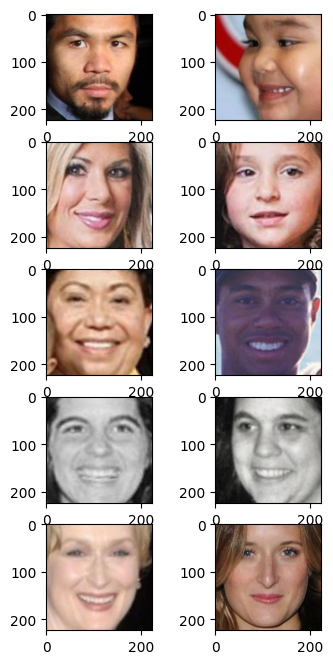

In [116]:
import cv2
import matplotlib.pyplot as plt
from random import choice

SAMPLE_COUNT = 5
samples = relations_df.sample(SAMPLE_COUNT)
print(samples)

image_px = 4
f, ax = plt.subplots(SAMPLE_COUNT, 2, figsize=(image_px, image_px*2))
print("Images of a few related people: ")
i = 0
for member in samples.values:
    img1 = training_image_path + '/' + member[0] + '/' + choice(os.listdir(training_image_path + '/' + member[0]))
    img2 = training_image_path + '/' + member[1] + '/' + choice(os.listdir(training_image_path + '/' + member[1]))
    rgb1 = cv2.cvtColor(cv2.imread(img1), cv2.COLOR_BGR2RGB)
    rgb2 = cv2.cvtColor(cv2.imread(img2), cv2.COLOR_BGR2RGB)
    ax[i][0].imshow(rgb1, cmap = plt.cm.Spectral)
    ax[i][1].imshow(rgb2, cmap = plt.cm.Spectral)  
    i = i + 1

## **Step 6**: Train the model

...

## **Step 7**: Test the model

...

## **Step 8**: Evaluation
Submissions are [evaluated](https://www.kaggle.com/competitions/recognizing-faces-in-the-wild/overview/evaluation) on area under the ROC curve between the predicted probability and the observed target. Not all pairs will be scored.

**Submission File**

For each img_pair in the test set, you must predict a probability for the is_related variable. The column img_pair describes the pair of images, i.e., abcdef-ghijkl means the pair of images abcdef.jpg and ghijkl.jpg.
The file should contain a header and have the following format:

```
img_pair,is_related
X3Nk6Hfe5x-qcZrTXsfde,0.0
X3Nk6Hfe5x-LD0pWDM8w_,0.0
X3Nk6Hfe5x-PHwuDtHyGp,0.0
X3Nk6Hfe5x-LO6lN_U4ot,0.0
...
```

In [69]:
results = [
    {"true_label": 1, "predicted_prob": 0.8},
    {"true_label": 0, "predicted_prob": 0.2},
    {"true_label": 1, "predicted_prob": 0.7},
    {"true_label": 0, "predicted_prob": 0.3},
    {"true_label": 0, "predicted_prob": 0.8},
    {"true_label": 0, "predicted_prob": 0.2},
    {"true_label": 1, "predicted_prob": 0.7},
    {"true_label": 1, "predicted_prob": 0.3},
]

[1, 0, 1, 0, 0, 0, 1, 1]


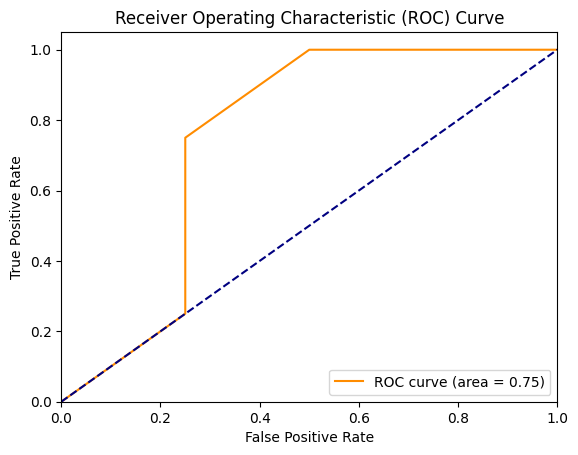

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# https://en.wikipedia.org/wiki/Receiver_operating_characteristic
def generate_roc_curve(data):
  true_labels = [d['true_label'] for d in data]
  print(true_labels)
  predicted_probs = [d['predicted_prob'] for d in data]
  fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  return plt
    
generate_roc_curve(results).show()